The objective of this project is to classify iris flowers into three species — Iris Setosa, Iris Versicolor, and Iris Virginica — based on their sepal and petal measurements using machine learning algorithms. The goal is to build an accurate predictive model that can automatically identify the iris species from given flower features.

In [1]:
import pandas as pd 
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

First, I imported the Iris dataset directly from sklearn.datasets.

This dataset contains 150 samples, with four main features — sepal length, sepal width, petal length, and petal width.

The target variable represents the flower species in numerical form — 0 for Setosa, 1 for Versicolor, and 2 for Virginica.

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
type(iris)

sklearn.utils._bunch.Bunch

Data Loading and Exploration

Using Pandas, I converted the dataset into a DataFrame to make it easier to analyze.

Then I added a new column called flower_name using the target labels, so that each row directly shows which flower type it belongs to.

Here, we can see a few samples from the dataset using the head() function.

In [5]:
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [6]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data[data.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
data[data.target == 1].count()

sepal length (cm)    50
sepal width (cm)     50
petal length (cm)    50
petal width (cm)     50
target               50
dtype: int64

In [10]:
data['flower_name'] = data.target.apply(lambda x : iris.target_names[x])

In [11]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

In [14]:
d1 = data[data.target == 0]
d2 = data[data.target == 1]
d3 = data[data.target == 2]
d3.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


Data Visualization

Next, I used Matplotlib to visualize how these flowers differ based on their sepal and petal dimensions.

I created scatter plots for Sepal Length vs Sepal Width and Petal Length vs Petal Width for all three species.

Each color represents a different flower:

Green → Iris Setosa

Blue → Iris Versicolor

Red → Iris Virginica

From the plots, we can clearly observe that Iris Setosa is quite distinct from the other two species, while Versicolor and Virginica have overlapping regions.

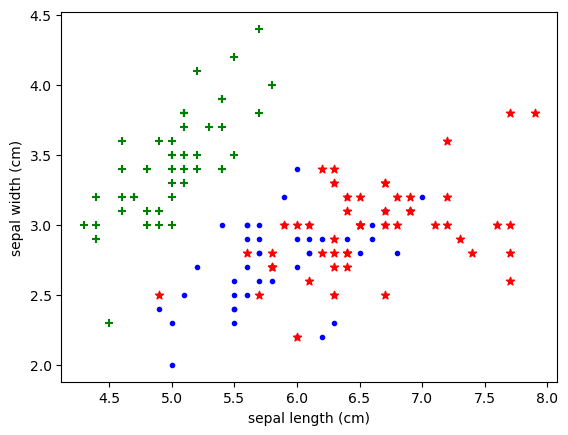

In [15]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(d1['sepal length (cm)'],d1['sepal width (cm)'], color = 'green', marker = '+')
plt.scatter(d2['sepal length (cm)'],d2['sepal width (cm)'], color = 'blue', marker = '.')
plt.scatter(d3['sepal length (cm)'],d3['sepal width (cm)'], color = 'red', marker = '*')

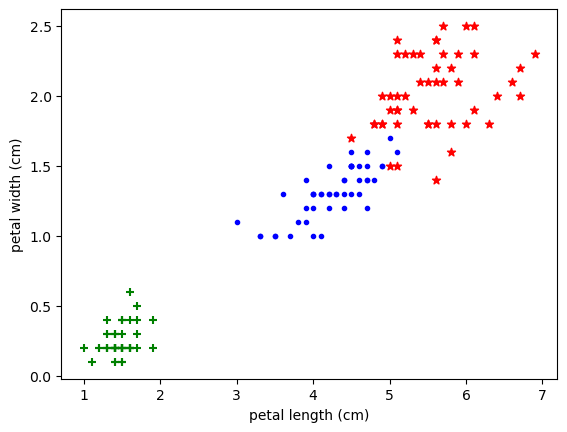

In [16]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(d1['petal length (cm)'],d1['petal width (cm)'], color = 'green', marker = '+')
plt.scatter(d2['petal length (cm)'],d2['petal width (cm)'], color = 'blue', marker = '.')
plt.scatter(d3['petal length (cm)'],d3['petal width (cm)'], color = 'red', marker = '*')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = data.drop(['target', 'flower_name'],axis = 'columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y = data.target

Splitting the Dataset

After visualization, I divided the data into training and testing sets using the train_test_split() function.

I used 80% of the data for training and 20% for testing to evaluate model performance fairly.

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

In [21]:
len(x_train)

120

In [22]:
len(x_test)

30

In [23]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
47,4.6,3.2,1.4,0.2
65,6.7,3.1,4.4,1.4
126,6.2,2.8,4.8,1.8
13,4.3,3.0,1.1,0.1
76,6.8,2.8,4.8,1.4
...,...,...,...,...
142,5.8,2.7,5.1,1.9
133,6.3,2.8,5.1,1.5
45,4.8,3.0,1.4,0.3
85,6.0,3.4,4.5,1.6


In [24]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
109,7.2,3.6,6.1,2.5
2,4.7,3.2,1.3,0.2
125,7.2,3.2,6.0,1.8
149,5.9,3.0,5.1,1.8
94,5.6,2.7,4.2,1.3
12,4.8,3.0,1.4,0.1
63,6.1,2.9,4.7,1.4
116,6.5,3.0,5.5,1.8
78,6.0,2.9,4.5,1.5
112,6.8,3.0,5.5,2.1


Building the Model

For classification, I used the Support Vector Machine (SVM) model from Scikit-learn.

SVM is a supervised learning algorithm that works very well for small datasets and clearly separates classes using a hyperplane.

After training the model with the training data, I checked its accuracy score on the same dataset.

In [25]:
from sklearn.svm import SVC
model = SVC()

In [26]:
model.fit(x_train,y_train)

SVC()

In [27]:
model.score(x_train, y_train)*100

95.83333333333334

Model Accuracy

The model achieved an accuracy of around 95.83, which shows that it performs very well in classifying the iris species correctly.

Visualizing Train vs Test Data

Finally, I created comparison scatter plots for both Train and Test datasets — separately for Sepal and Petal features.

These visualizations help verify that the training and testing data have similar patterns and that our model can generalize effectively.

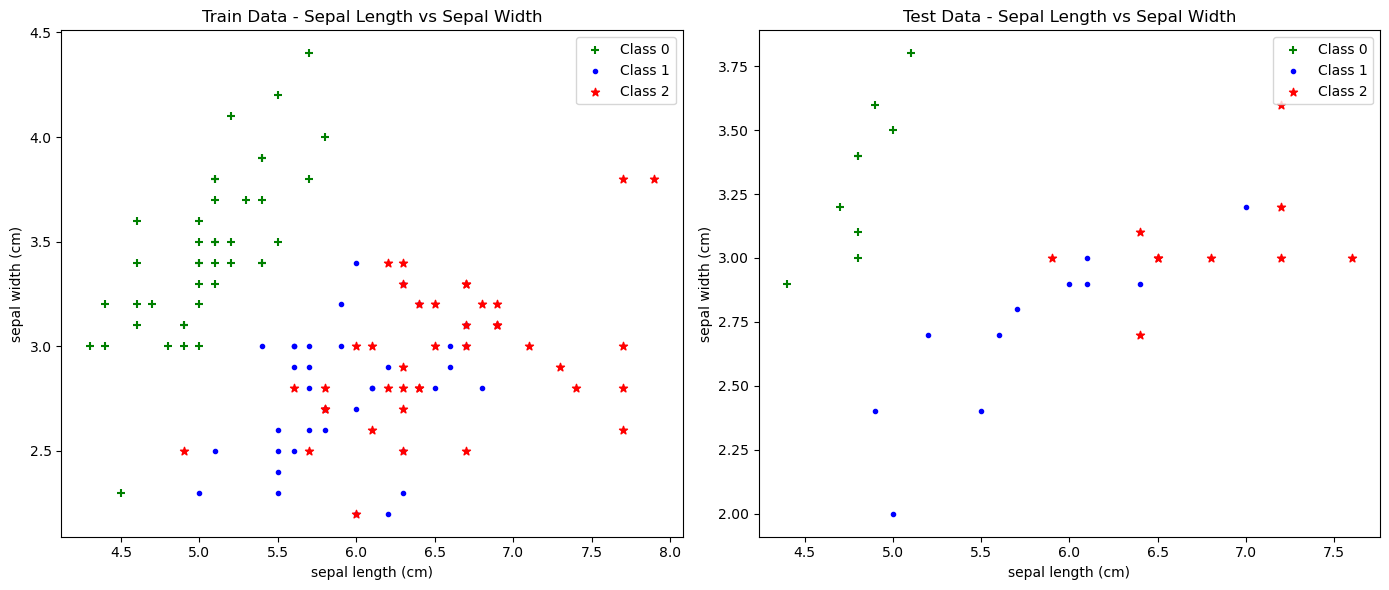

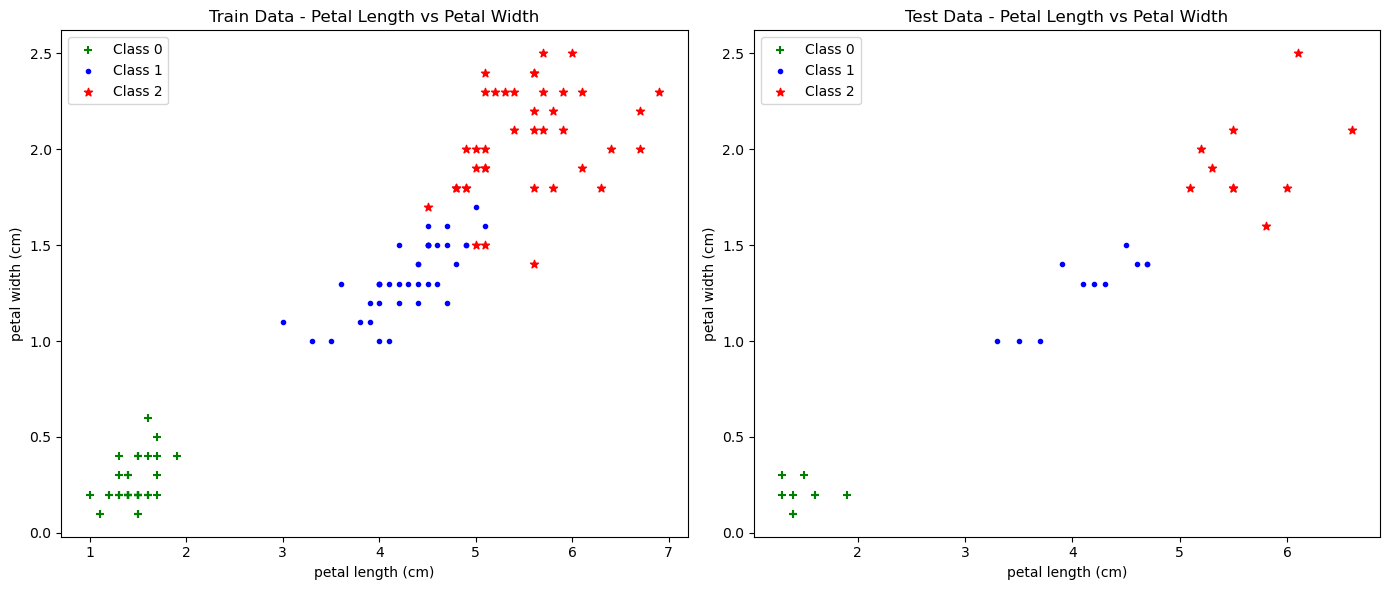

In [28]:
import matplotlib.pyplot as plt

# Separate train and test data for each target class
train_d1 = x_train[y_train == 0]
train_d2 = x_train[y_train == 1]
train_d3 = x_train[y_train == 2]

test_d1 = x_test[y_test == 0]
test_d2 = x_test[y_test == 1]
test_d3 = x_test[y_test == 2]

# Scatter plot for Sepal Length vs Sepal Width
plt.figure(figsize=(14, 6))

# Train data plot
plt.subplot(1, 2, 1)
plt.title("Train Data - Sepal Length vs Sepal Width")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(train_d1['sepal length (cm)'], train_d1['sepal width (cm)'], color='green', marker='+', label="Class 0")
plt.scatter(train_d2['sepal length (cm)'], train_d2['sepal width (cm)'], color='blue', marker='.', label="Class 1")
plt.scatter(train_d3['sepal length (cm)'], train_d3['sepal width (cm)'], color='red', marker='*', label="Class 2")
plt.legend()

# Test data plot
plt.subplot(1, 2, 2)
plt.title("Test Data - Sepal Length vs Sepal Width")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(test_d1['sepal length (cm)'], test_d1['sepal width (cm)'], color='green', marker='+', label="Class 0")
plt.scatter(test_d2['sepal length (cm)'], test_d2['sepal width (cm)'], color='blue', marker='.', label="Class 1")
plt.scatter(test_d3['sepal length (cm)'], test_d3['sepal width (cm)'], color='red', marker='*', label="Class 2")
plt.legend()
plt.tight_layout()
plt.show()

# Scatter plot for Petal Length vs Petal Width
plt.figure(figsize=(14, 6))

# Train data plot
plt.subplot(1, 2, 1)
plt.title("Train Data - Petal Length vs Petal Width")
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(train_d1['petal length (cm)'], train_d1['petal width (cm)'], color='green', marker='+', label="Class 0")
plt.scatter(train_d2['petal length (cm)'], train_d2['petal width (cm)'], color='blue', marker='.', label="Class 1")
plt.scatter(train_d3['petal length (cm)'], train_d3['petal width (cm)'], color='red', marker='*', label="Class 2")
plt.legend()

# Test data plot
plt.subplot(1, 2, 2)
plt.title("Test Data - Petal Length vs Petal Width")
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(test_d1['petal length (cm)'], test_d1['petal width (cm)'], color='green', marker='+', label="Class 0")
plt.scatter(test_d2['petal length (cm)'], test_d2['petal width (cm)'], color='blue', marker='.', label="Class 1")
plt.scatter(test_d3['petal length (cm)'], test_d3['petal width (cm)'], color='red', marker='*', label="Class 2")
plt.legend()
plt.tight_layout()
plt.show()


In [29]:
data.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


Conclusion

To conclude, the Iris Flower Classification project demonstrates how machine learning can be applied to classify flowers based on their physical measurements.

It’s a simple yet powerful example of supervised learning, data visualization, and model evaluation using Python.